In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor

In [ ]:
url = '/content/IT Salary Survey EU 2020.csv'
df= pd.read_csv(url)
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [ ]:
df['Yearly bonus + stocks in EUR'] = pd.to_numeric(df['Yearly bonus + stocks in EUR'], errors='coerce')
df['Annual bonus+stocks one year ago. Only answer if staying in same country'] = pd.to_numeric(df['Annual bonus+stocks one year ago. Only answer if staying in same country'], errors='coerce')
df['Number of vacation days'] = pd.to_numeric(df['Number of vacation days'], errors='coerce')
df['Total years of experience'] = pd.to_numeric(df['Total years of experience'], errors='coerce')
df['Years of experience in Germany'] = pd.to_numeric(df['Years of experience in Germany'], errors='coerce')

In [ ]:
df.rename(columns={
    "Annual bonus+stocks one year ago. Only answer if staying in same country": "Annual bonus+stocks",
    "Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week": "kurzarbeit hours per week",
}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

# **1. Crear transformación de imputación para cada uno de los tipos de variables. Justificar el mètodo de imputaciòn**

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

In [ ]:
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1253 non-null   float64
 2   Gender                                                                                                                   1253 non-null   object 
 3   City                                                                                                                     1253 non-null   o

**Justificacion:**

La imputación con la media reserva la tendencia central de los datos y es menos sensible a valores atípicos.

La imputación con la moda s una estrategia apropiada para variables categóricas porque selecciona el valor más común, lo que tiende a preservar la estructura y la tendencia de las categorías existentes.Esta estrategia es útil cuando se desea mantener la distribución de las categorías y se considera que la categoría más frecuente es una buena aproximación de los valores faltantes.

# **2. Probar los respectivos escalados en los datos numéricos(maxMin,Standard). Justificar en este caso cuál es mejor escalado.**

In [ ]:
minmax_scaler = MinMaxScaler()

In [ ]:
df[num_cols] = minmax_scaler.fit_transform(df[num_cols])

In [ ]:
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,kurzarbeit hours per week,"Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,0.122449,Male,Munich,Software Engineer,0.013055,0.100000,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,0.000200,0.082192,Full-time employee,Unlimited contract,English,51-100,Product,No,0.324196,0
1,24/11/2020 11:14:16,0.122449,Male,Berlin,Backend Developer,0.018277,0.133333,Senior,Ruby,Javascript / Typescript,...,0.000100,0.076712,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.324196,0
2,24/11/2020 11:14:21,0.183673,Male,Berlin,Software Engineer,0.031332,0.200000,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,0.002000,0.082192,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,0.324196,0
3,24/11/2020 11:15:24,0.163265,Male,Berlin,Frontend Developer,0.010444,0.033333,Junior,Javascript,Javascript / Typescript,...,0.002064,0.065753,Full-time employee,Unlimited contract,English,51-100,Startup,No,0.324196,0
4,24/11/2020 11:15:46,0.346939,Male,Berlin,Backend Developer,0.044386,0.200000,Senior,C# .NET,".NET, SQL, AWS, Docker",...,0.002064,0.079452,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.324196,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,0.224490,Male,Berlin,Backend Developer,0.023499,0.166667,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,0.001440,0.071233,Full-time employee,Unlimited contract,English,51-100,Product,Yes,0.324196,0
1249,18/01/2021 17:46:02,0.265306,Male,Berlin,Researcher/ Consumer Insights Analyst,0.026110,0.050000,Senior,consumer analysis,Javascript / Typescript,...,0.000050,0.077667,Full-time employee,Unlimited contract,English,1000+,Product,No,0.324196,0
1250,18/01/2021 23:20:35,0.387755,Male,Munich,IT Operations Manager,0.039164,0.066667,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,0.002064,0.076712,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,0.324196,0
1251,19/01/2021 10:17:58,0.122449,Male,Saarbrücken,Frontend Developer,0.018277,0.233333,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,0.000728,0.073973,Full-time employee,Unlimited contract,German,101-1000,Product,No,0.324196,0


In [ ]:
##standard_scaler = StandardScaler()

In [ ]:
##df[num_cols] = standard_scaler.fit_transform(df[num_cols])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1253 non-null   float64
 2   Gender                                                                                                                   1253 non-null   object 
 3   City                                                                                                                     1253 non-null   o

**Justificacion**

En mi opinión, opté por utilizar MinMaxScaler en lugar de StandardScaler para normalizar mis datos debido a varias razones. En primer lugar,  la idea de tener los datos en un rango específico, generalmente entre 0 y 1, ya que esto facilita la comparación de las características y asegura que todos los valores sean positivos. Además, en el conjunto de datos, las características tenían escalas muy diferentes, y MinMaxScaler permitía igualar esas escalas de manera efectiva.

# **3. Determinar la mejor transformación categórica(onehot vs ordinal) para cada columna. Justificar.**

In [ ]:
df3 = df

In [ ]:
# One-Hot Encoding
one_hot_cols = [
    'Gender',
    'City',
    'Position ',
    'Your main technology / programming language',
    'Other technologies/programming languages you use often',
    'Employment status',
    'Сontract duration',
    'Main language at work',
    'Company size',
    'Company type',
    'Have you lost your job due to the coronavirus outbreak?',
    'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
]
df3 = pd.get_dummies(df3, columns=one_hot_cols, drop_first=False)

In [ ]:
# Ordinal Encoding
ordinal_cols = [
    'Seniority level',
]
encoder = OrdinalEncoder(categories=[['Senior', 'Middle', 'Lead', 'Junior', 'Head', 'Principal', 'student', 'Intern', 'Entry level'
                                      , 'Working Student', 'C-Level', 'no idea, there are no ranges in the firm ', 'Student', 'intern', 'Key','C-level executive manager'
                                      ,'Director', 'No level ', 'CTO','Work Center Manager', 'Manager','VP','No level','Self employed']])
df3['Seniority level'] = encoder.fit_transform(df3[['Seniority level']])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1253 non-null   float64
 2   Gender                                                                                                                   1253 non-null   object 
 3   City                                                                                                                     1253 non-null   o

**Justificacion**

A las columnas que se les aplico ONE.HOT ENCONDING contienen categorías que no tienen un orden lógico y son igualmente relevantes. Usar One-Hot Encoding permite tratar cada categoría como una entidad independiente sin introducir suposiciones de orden.

A la que se le aplico ORDINAL ENCONDING, tiene un orden jerárquico en los niveles de seniority. Por lo tanto, se utilizó Ordinal Encoding para mantener esa jerarquía y representarla en forma numérica.

# **4. Crear un transformer personalizado que procese  los string de las variables categóricas de la columna: lenguaje de programación. Se debe crear una columna por cada lenguaje indicando con un 1 si maneja determinado lenguaje.**

In [ ]:
df_copia = df.copy()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class LanguageTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        unique_languages = set()
        for row in X["Your main technology / programming language"]:
            unique_languages.update(row.split(", "))

        for language in unique_languages:
            X[language] = 0

        for idx, row in X.iterrows():
            languages = row["Your main technology / programming language"].split(", ")
            for language in languages:
                X.at[idx, language] = 1

        return X

language_transformer = LanguageTransformer()
df_transformed = language_transformer.transform(df_copia)

<ipython-input-65-d20b6fc139cf>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[language] = 0
<ipython-input-65-d20b6fc139cf>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[language] = 0
<ipython-input-65-d20b6fc139cf>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[language] = 0
<ipytho

# **5. Hacer la distribución de las variables numéricas más Gaussianas.**

In [ ]:
df5 = df

In [ ]:
columns_to_transform = [
    "Age",
    "Total years of experience",
    "Years of experience in Germany",
    "Number of vacation days",
    "Annual bonus+stocks",
    "kurzarbeit hours per week",
]

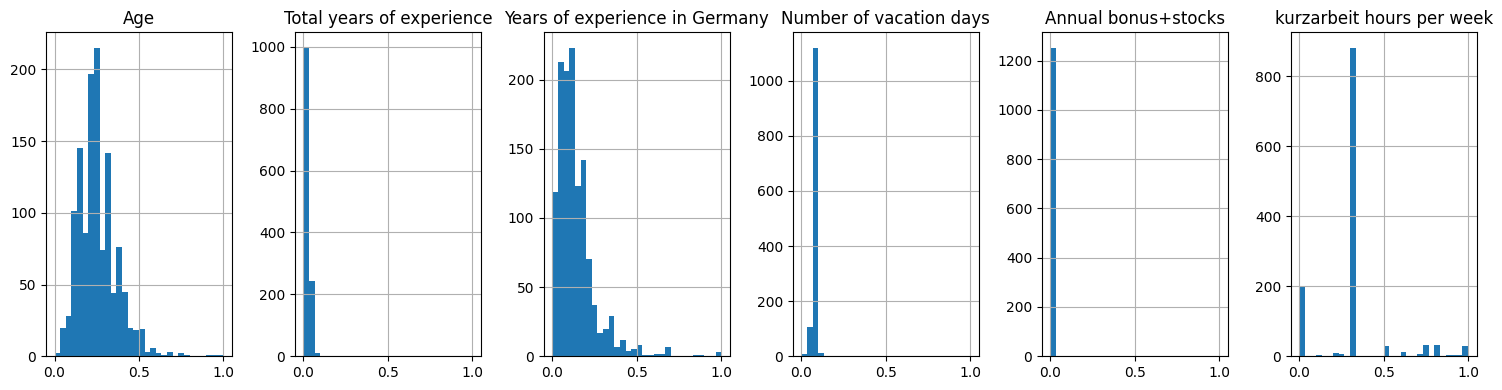

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_transform), figsize=(15, 4))
for i, column in enumerate(columns_to_transform):
    df[column].hist(ax=axes[i], bins=30)
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

In [ ]:
for column in columns_to_transform:
    if any(df5[column] <= 0):
        transformed, _ = stats.boxcox(df5[column] + 1)
        df5[column] = transformed
    else:
        df5[column] = np.log1p(df5[column])

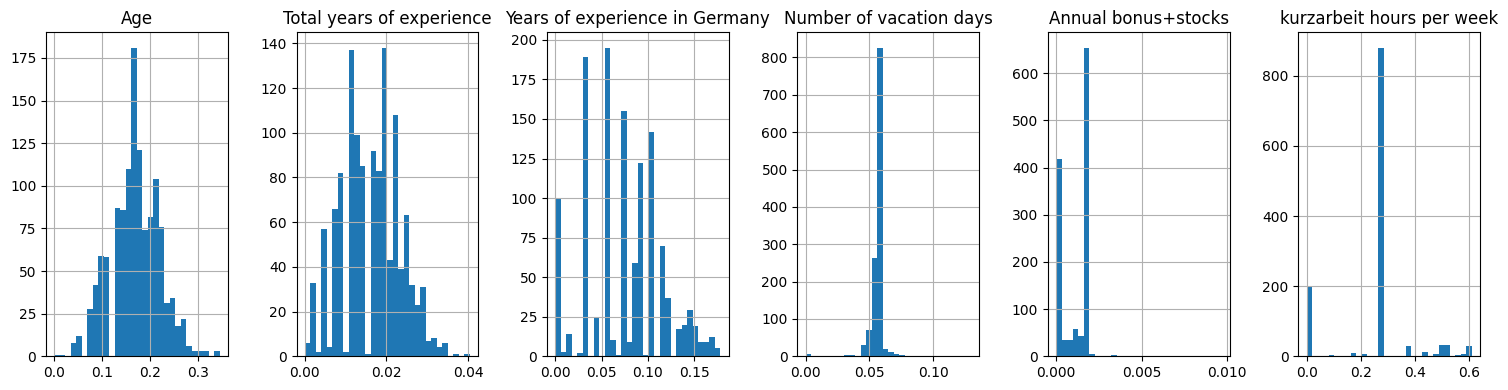

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_transform), figsize=(15, 4))
for i, column in enumerate(columns_to_transform):
    df5[column].hist(ax=axes[i], bins=30)
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

# **6. Crear un pipeline Numérico y otro Categórico. Unir ambos en un solo pipeline usando ColumnTransformer.**

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns


In [ ]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])


In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [ ]:
X_processed = pipeline.fit_transform(df)

# **7. Guardar el pipeline como joblib.**

In [ ]:
archivo_joblib = 'mi_pipeline.joblib'

In [ ]:
joblib.dump(pipeline, archivo_joblib)

['mi_pipeline.joblib']

In [ ]:
print("Pipeline guardado como archivo joblib:", archivo_joblib)

Pipeline guardado como archivo joblib: mi_pipeline.joblib


# **8. Cargar el pipeline y probarlo con un dato de entrada.**

In [ ]:
loaded_pipeline = joblib.load(archivo_joblib)

In [ ]:
nuevo_dato = pd.DataFrame({
    "Timestamp": ["24/11/2020 11:14:15"],
    "Age": [26],
    "Gender": ["Male"],
    "City": ["Munich"],
    "Position ": ["Software Engineer"],
    "Total years of experience": [5],
    "Years of experience in Germany": [3],
    "Seniority level": ["Senior"],
    "Your main technology / programming language": ["TypeScript"],
    "Other technologies/programming languages you use often": ["Kotlin, Javascript / Typescript"],
    "Yearly brutto salary (without bonus and stocks) in EUR": [80000],
    "Yearly bonus + stocks in EUR": [5000],
    "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country": [75000],
    "Annual bonus+stocks": [10000],
    "Number of vacation days": [30],
    "Employment status": ["Full-time employee"],
    "Сontract duration": ["Unlimited contract"],
    "Main language at work": ["English"],
    "Company size": ["51-100"],
    "Company type": ["Product"],
    "Have you lost your job due to the coronavirus outbreak?": ["No"],
    "kurzarbeit hours per week": [5],
    "Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR": ["0"]
})

In [ ]:
resultado = loaded_pipeline.transform(nuevo_dato)


In [ ]:
print("Resultado después de aplicar el pipeline:")
print(resultado)

Resultado después de aplicar el pipeline:
  (0, 0)	512.1270585478995
  (0, 1)	710.3648170273327
  (0, 2)	70.37962699780537
  (0, 3)	2832927.524361427
  (0, 4)	177097.03703814364
  (0, 5)	2656626.3713754816
  (0, 6)	11480591.109092105
  (0, 7)	4605.925103891615
  (0, 8)	34.61942920565304
  (0, 237)	1.0
  (0, 1257)	1.0
  (0, 1335)	1.0
  (0, 1488)	1.0
  (0, 1538)	1.0
  (0, 1751)	1.0
  (0, 2000)	1.0
  (0, 2363)	1.0
  (0, 2373)	1.0
  (0, 2376)	1.0
  (0, 2389)	1.0
  (0, 2432)	1.0
  (0, 2456)	1.0
  (0, 2462)	1.0
